In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

%matplotlib notebook

<IPython.core.display.Javascript object>


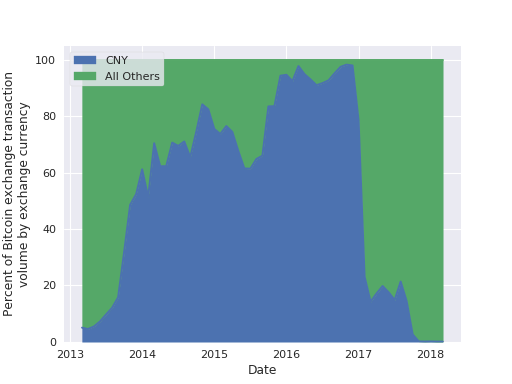

In [12]:
# Plot percent of bitcoin exchange transaction volume in CNY compared to all other currencies

df_currency = pd.read_csv('data/exchange_vol_5yr_daily_per_currency.csv')
df_currency.fillna(0, inplace=True)
df_currency.Time = pd.to_datetime(df_currency['Time'])
df_currency.set_index(['Time'],inplace=True)
df_currency["total"] = df_currency.sum(axis=1)

df_currency_percentage = df_currency.copy(deep=True)
df_currency_percentage.drop(['total'], axis=1, inplace=True)
df_currency_percentage = df_currency_percentage.divide(df_currency_percentage.sum(axis=1), axis=0)
df_currency_percentage *= 100.  # Make into percentage

df_currency_percentage_cny_vs_all = df_currency_percentage.copy(deep=True)
df_currency_percentage_cny_vs_all["All Others"]=df_currency_percentage_cny_vs_all['AUD'] + df_currency_percentage_cny_vs_all['CAD'] + df_currency_percentage_cny_vs_all['EUR']+ df_currency_percentage_cny_vs_all['GBP'] + df_currency_percentage_cny_vs_all['JPY']+ df_currency_percentage_cny_vs_all['KRW'] + df_currency_percentage_cny_vs_all['PLN']+ df_currency_percentage_cny_vs_all['USD']+ df_currency_percentage_cny_vs_all['others']
df_currency_percentage_cny_vs_all.drop(['AUD', 'CAD', 'EUR', 'GBP', 'JPY', 'KRW', 'PLN', 'USD', 'others'], axis=1, inplace=True)

ax = df_currency_percentage_cny_vs_all.resample('M').mean().plot.area()
ax.legend(loc=2, frameon=True)
ax.set_xlabel("Date")
ax.set_ylabel("Percent of Bitcoin exchange transaction\nvolume by exchange currency");

<IPython.core.display.Javascript object>


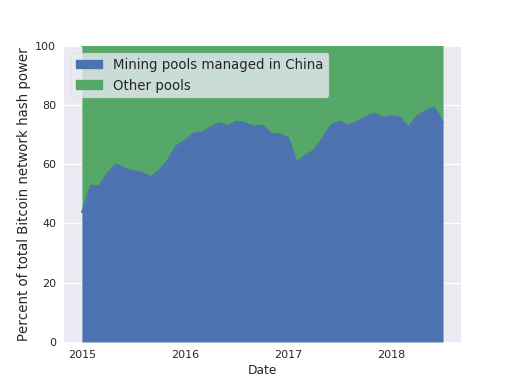

In [13]:
# Plot hash rate data from BTC.com

df = pd.read_csv("data/hashrate_from_BTC_com.csv").fillna(0)
df["Time"] = pd.to_datetime(df['yyyymm'], format="%Y%m")
df = df.set_index("Time").drop("yyyymm", axis=1)

df["Other/Unattributed"] = df["Other-Adjusted"]
df = df.drop("TotalNumBlocks",axis=1).drop("Other-Raw",axis=1).drop("Other-Adjusted",axis=1)

# Make a new dataframe, df2, with data aggregated for Chinese miners and everyone else
df2 = pd.DataFrame()
chinese_pools = ["AntPool", 'BTCC', 'BTC.com', 'F2Pool', 'BW.COM', "ViaBTC", "58COIN", "Bixin", "BTC.TOP", "DPOOL", "Poolin"]
df2["Mining pools managed in China"] = df[chinese_pools].sum(axis=1)
df2['Other pools'] = 100. - df2["Mining pools managed in China"]
df2 = df2.divide(df2.sum(axis=1), axis=0) * 100

ax = df2.plot.area(ylim=(0., 100.))
ax.legend(frameon=True, fontsize="medium",loc="upper left")
ax.set_xlabel("Date")
ax.set_ylabel("Percent of total Bitcoin network hash power",fontsize="medium")

# Set xticks manually so that years are shown without months
ax.minorticks_off()
ax.set_xticklabels(['2015', '2016', '2017', '2018']);

<IPython.core.display.Javascript object>


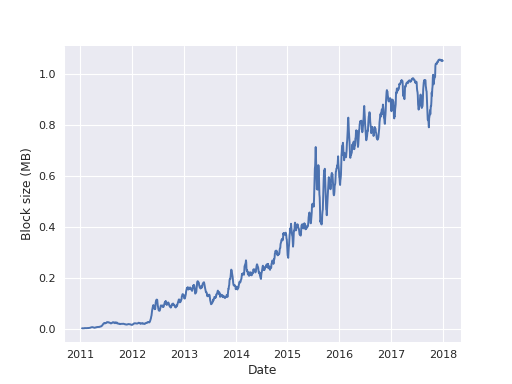

In [14]:
# Plot Block size over time

df_total_avg = pd.read_csv('data/block_size_data/avg-block-size.csv')
df_tmp = pd.read_csv('data/block_size_data/n-transactions-per-block.csv')
df_total_avg['avg_num_tx_per_block'] = df_tmp['avg_tx_per_block_per_day']
df_total_avg.rename(columns={'block_size_in_MB': 'avg_size'}, inplace=True)
df_total_avg['Date'] = pd.to_datetime(df_total_avg['timestamp'])
df_total_avg.set_index('Date', inplace=True)
df_total_avg = df_total_avg.drop(['timestamp'], axis=1)

w = 7
df_total_avg = df_total_avg['2011-01-01':'2018-01-01']
plt.figure()
ax = df_total_avg['avg_size'].rolling(window=w).mean().plot()
ax.set_ylabel("Block size (MB)");

<IPython.core.display.Javascript object>


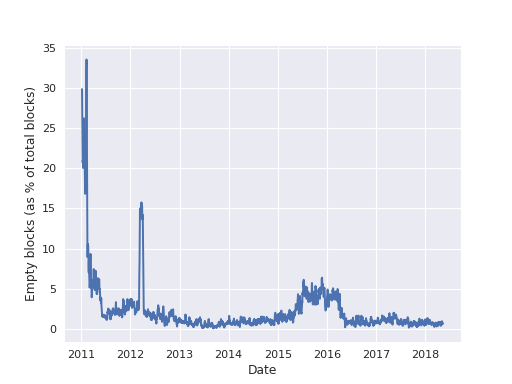

In [15]:
# Plot percent of empty blocks accepted to the main chain

df_tx_count = pd.read_csv('data/block_size_data/all_blocks_n_transactions.csv')
df_tx_count['date'] = pd.to_datetime(df_tx_count['time'])
df_tx_count = df_tx_count.set_index('date').drop(['time'])

df_empty_blocks = df_tx_count.groupby(df_tx_count.index.date).count().rename(columns={'transaction_count': 'num_blocks'})
df_tx_count = df_tx_count[df_tx_count.transaction_count < 2]
df_tx_count = df_tx_count.groupby(df_tx_count.index.date).count()\
                         .rename(columns={'transaction_count': 'num_blocks'})\
                         .rename(columns={'num_blocks': 'num_empty_blocks'})
df_empty_blocks['num_empty_blocks'] = df_tx_count['num_empty_blocks']
df_empty_blocks = df_empty_blocks.fillna(0)
df_empty_blocks['pct_empty'] = df_empty_blocks['num_empty_blocks']/df_empty_blocks['num_blocks'] * 100.

df_empty_blocks['Date'] = pd.to_datetime(df_empty_blocks.index)
df_empty_blocks.set_index('Date', inplace=True)

plt.figure()
ax = df_empty_blocks['pct_empty'].rolling(window=7).mean().plot()
ax.set_ylabel("Empty blocks (as % of total blocks)");

In [16]:
# Load empty block data for each pool into the df_empty_blocks datframe

pools_and_files = [('AntPool', 'data/block_size_data/antpool_blocks.csv', ['time', 'transaction_count', 'size']), 
                   ('BW Pool', 'data/block_size_data/bw_dot_com_blocks.csv', ['time', 'transaction_count', 'size']),
                   ('F2 Pool', 'data/block_size_data/f2pool_blocks.csv', ['time', 'transaction_count', 'size']),
                   ('BTCC', 'data/block_size_data/btcc_blocks.csv', ['time','guessed_miner','transaction_count']),
                   ("Bitfury", 'data/block_size_data/bitfury_blocks.csv', ['time','guessed_miner','transaction_count']),
                   ('Slush Pool', 'data/block_size_data/slushpool_blocks.csv', ['time','guessed_miner','transaction_count']),
                   ('KNC', 'data/block_size_data/kncminer_blocks.csv', ['time','guessed_miner','transaction_count']),
                   ('21 Inc', 'data/block_size_data/21inc_blocks.csv', ['time','guessed_miner','transaction_count'])]

df_empty_blocks = pd.DataFrame()
for pool, filename, fields in pools_and_files:
    pool_df = pd.read_csv(filename)[fields]
    pool_df['date'] = pd.to_datetime(pool_df['time'])
    pool_df.set_index('date', inplace=True)

    # Drop columns except transaction_count
    pool_df = pool_df[['transaction_count']]
    
    # Compute the total blocks mined each day
    tot_block_series = pool_df.groupby(pool_df.index.date).count()['transaction_count'].astype(float)
    
    # Compute number of empty blocks mined each day
    tmp = pool_df[pool_df.transaction_count<2]
    empty_block_series = tmp.groupby(tmp.index.date).count()['transaction_count'].astype(float)
    
    # Compute percentage of empty blocks mined in a day
    divided = empty_block_series / tot_block_series * 100.
    divided.index = pd.to_datetime(divided.index)
    divided.fillna(0, inplace=True)
    
    # Save the result to df_empty_blocks for plotting and more analysis
    df_empty_blocks[pool] = divided

df_empty_blocks.fillna(0., inplace=True)

<IPython.core.display.Javascript object>


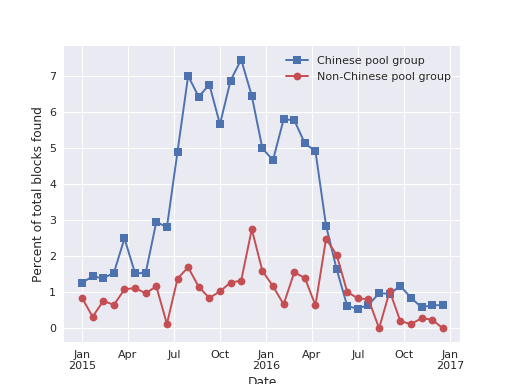

In [17]:
# Plot the daily average empty block percentage of the group of Chinese miners and non-Chinese miners, sampled every 3 weeks

chinese_pools = ['AntPool', 'BW Pool','F2 Pool', 'BTCC']
non_chinese_pools = ['Bitfury', 'Slush Pool', 'KNC', '21 Inc']

group_empty_blocks_df = pd.DataFrame()
group_empty_blocks_df['Chinese pool group'] = df_empty_blocks[chinese_pools].sum(axis=1) / len(chinese_pools)
group_empty_blocks_df['Non-Chinese pool group'] = df_empty_blocks[non_chinese_pools].sum(axis=1)\
                                                  / len(non_chinese_pools)
ax = group_empty_blocks_df.resample('3W').mean()['1/2015':'12/2016'].plot(colormap="Spectral", style=['bs-','ro-'])
ax.set_xlabel('Date')
ax.set_ylabel('Percent of total blocks found');

<IPython.core.display.Javascript object>


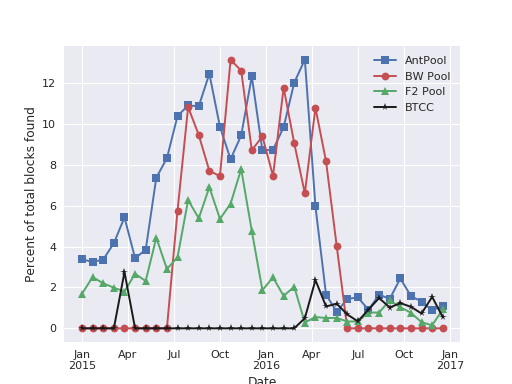

In [18]:
# Plot the daily average empty block percentage of each Chinese miner

ax = df_empty_blocks[chinese_pools].resample('3W').mean()['1/2015':'12/2016']\
     .plot(colormap="Spectral", style=['bs-','ro-','g^-','k*-'])
ax.set_xlabel('Date')
ax.set_ylabel('Percent of total blocks found');